In [1]:
import pandas as pd
import os.path
import datetime
import BoW
from sklearn.model_selection import train_test_split
import string
from nltk.corpus import stopwords
from gensim.models import Word2Vec

In [2]:
# Data Loading
path = os.getcwd()
parent_folder, current_folder = os.path.split(path)
df = pd.read_csv(parent_folder + '/0.Raw_data/train/Combined_News_DJIA_train.csv')   # please check if Training data is in the same location on your PC

In [3]:
def cleaning(mess):
    """
    Takes in a string of text, then performs the following:
    1. Lower case of all words
    2. Remove all punctuation
    3. Remove all stopwords
    4. Returns a list of the cleaned text
    """

    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)

    # Now just remove any stopwords
    return [word for word in nopunc.split() if word not in stopwords.words('english')]

In [4]:
# Data Cleaning and merging all headlines to one single column

df.iloc[:,2:27] = df.iloc[:,2:27].applymap(str)

# replace the b' and b" which are in the beginning of some headlines
df.iloc[:,2:27] = df.iloc[:,2:27].replace(regex="b'",value="")
df.iloc[:,2:27] = df.iloc[:,2:27].replace(regex='b"',value='')
df.iloc[:,2:27] = df.iloc[:,2:27].apply(lambda x: x.astype(str).str.lower())

#df1['lengths'] = df1['headlines'].apply(len)
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
for i in range(2,27):
    df.iloc[:,i] = df.iloc[:,i].apply(cleaning)

In [6]:

#df.to_csv('cleaned_tokenized.csv')

In [25]:
X_train, X_val, y_train, y_val = train_test_split(df.loc[:, df.columns != 'Label'], df['Label'], test_size=0.20, random_state=2)

In [8]:
sentences = []
for i in range(1,25):
    sentences.extend(X_train.iloc[:,i].tolist())
    
len(sentences)

30408

(array([2.9300e+03, 1.0793e+04, 6.5800e+03, 3.7080e+03, 2.7100e+03,
        1.8350e+03, 1.1790e+03, 5.6900e+02, 9.6000e+01, 8.0000e+00]),
 array([ 1.,  5.,  9., 13., 17., 21., 25., 29., 33., 37., 41.]),
 <a list of 10 Patch objects>)

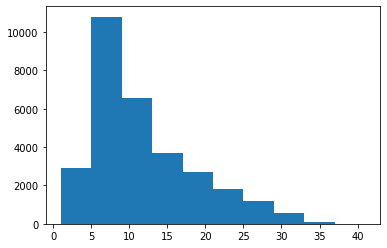

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist([len(x) for x in sentences])

In [10]:
model = Word2Vec(sentences, min_count=2)

In [13]:
def transform_vocab(wordlist):
    filtered_wl = [word for word in wordlist if word in model.wv.vocab]
    return model.wv[filtered_wl] 

In [26]:
for i in range(1,26):
    X_train.iloc[:,i] = X_train.iloc[:,i].apply(transform_vocab)

In [52]:
def padding(wordlist):
    paddings = 20 - len(wordlist)
    padded_wordlist = paddings *[100*[0]] + wordlist[0:20].tolist()
    return padded_wordlist

In [34]:
for i in range(1,26):
    X_train.iloc[:,i] = X_train.iloc[:,i].apply(padding)

ValueError: operands could not be broadcast together with shapes (4,100) (16,100) 

In [32]:
import numpy as np
[np.zeros(3)]*3

[array([0., 0., 0.]), array([0., 0., 0.]), array([0., 0., 0.])]

In [49]:
np.concatenate(X_train.iloc[1201,2],np.array(12*[100*[0]]))

TypeError: only integer scalar arrays can be converted to a scalar index

In [51]:
len(X_train.iloc[1201,2].tolist() + 12*[100*[0]])

20

In [47]:
np.array(12*[100*[0]])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [83]:
model.wv.most_similar(positive='woman')

[('young', 0.9963662624359131),
 ('men', 0.9962849020957947),
 ('death', 0.995673656463623),
 ('sentenced', 0.9951450228691101),
 ('arrested', 0.9949872493743896),
 ('five', 0.9941661953926086),
 ('protesters', 0.9932349324226379),
 ('jail', 0.992759108543396),
 ('girl', 0.9923790693283081),
 ('three', 0.9922330379486084)]